# Intoduction
---

👋Hello this is my profile

I’m Muhammad Septian Zamzani, a Data Scientist driven by a passion for turning raw data into meaningful insights. With robust training from Hacktiv8’s Full Time Data Science program and a experience background in industries such as Creative, and education, I'm skilled at using data to solve practical issues in real-world and support strategic business decisions📊🔍.

You can check my recent project [Click Here](https://github.com/mseptianz)


# Identifikasi Masalah
---
Data penjualan yang tersedia mencakup transaksi dari mulai Desember 2010 hingga November 2011. Data penjualan mengandung informasi mengenai Kode Stock produk, Deskripsi,pelanggan, kuantitas, harga,Tanggal.

Dari Data yang tersedia akan dilakukan analisis yang optimal untuk mengidentifikasi pola dan tren yang dapat membantu dalam strategi peningkatan pendapatan.   

**Problem Statement** :   
> "Meningkatkan revenue perusahaan sebesar 10% dalam satu tahun ke depan dengan memanfaatkan analisis data penjualan dari Desember 2010 hingga November 2011. Fokus analisis adalah pada identifikasi produk terlaris, dan perilaku pelanggan untuk merancang strategi penjualan yang lebih efisien dan berbasis data."

**SMART Objectives** :

- **Specific :**
Meningkatkan revenue perusahaan dengan mengoptimalkan penjualan produk terlaris, menerapkan strategi upselling dan cross-selling, serta mengidentifikasi segmentasi pelanggan potensial menggunakan data historis.

- **Measurable :**
Meningkatkan revenue sebesar 10% dibandingkan dengan periode sebelumnya dengan memanfaatkan analisis berbasis data.

- **Achievable :**
Mencapai target ini dengan menggunakan data penjualan untuk merancang promosi yang efektif, memahami pola pembelian pelanggan, dan menerapkan program loyalitas untuk meningkatkan retensi pelanggan.

- **Relevant :**
Tujuan ini sesuai dengan prioritas perusahaan untuk meningkatkan keuntungan melalui strategi berbasis data dan efisiensi operasional.

- **Time-bound :**
Strategi akan diterapkan dalam 1 tahun ke depan, dengan target evaluasi setiap kuartal untuk memastikan progres.


# Data Dictionary
---
### Raw Data

| **Nama Kolom**   | **Tipe Data** | **Deskripsi**                                                                                   |
|-------------------|--------------|-----------------------------------------------------------------------------------------------|
| `InvoiceNo`       | Object       | Nomor faktur unik untuk setiap transaksi.                                                     |
| `StockCode`       | Object       | Kode unik untuk setiap produk.                                                               |
| `Description`     | Object       | Deskripsi dari produk yang dijual.                                                           |
| `Quantity`        | Integer      | Jumlah unit produk yang dibeli dalam setiap transaksi.                                       |
| `InvoiceDate`     | Object       | Tanggal dan waktu terjadinya transaksi.                                                     |
| `UnitPrice`       | Float        | Harga per unit dari produk.                                                                 |
| `CustomerID`      | Float        | ID unik untuk setiap pelanggan.                                                                |
| `Country`         | Object       | Negara tempat pelanggan berada.                                                             |


### Additional Data


# Import Libraries
---

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import skew
from feature_engine.outliers import Winsorizer

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)

# Load Data
---

In [67]:
df_iterator = pd.read_csv("online_shoppers_1.csv", encoding="latin1", chunksize=10000)
df = pd.concat(df_iterator, ignore_index=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
459973,575889,23084,RABBIT NIGHT LIGHT,4,11/11/2011 14:09,2.08,16433.0,United Kingdom
459974,575889,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,11/11/2011 14:09,1.25,16433.0,United Kingdom
459975,575889,23023,RIDGED BONNE JAM JAR T-LIGHT HOLDER,12,11/11/2011 14:09,1.65,16433.0,United Kingdom
459976,575889,22080,RIBBON REEL POLKADOTS,5,11/11/2011 14:09,1.65,16433.0,United Kingdom


# Data Preparation
---

In [68]:
# Mengecek data 5 baris paling atas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459978 entries, 0 to 459977
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    459978 non-null  object 
 1   StockCode    459978 non-null  object 
 2   Description  458600 non-null  object 
 3   Quantity     459978 non-null  int64  
 4   InvoiceDate  459978 non-null  object 
 5   UnitPrice    459978 non-null  float64
 6   CustomerID   346450 non-null  float64
 7   Country      459978 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.1+ MB


Dari Hasil Cek diatas diketahui :
- Dataset ini memiliki 459978 Baris dengan 7 kolom
- Terdapat Missing value pada kolm `Description` dan kolom `CustomerId`.
- Terdapat ketidak sesuaian tipe data pada kolom `InvoiceDate`. Kolom ini masih bertipe data `object`,Untuk mempermudah analisis kolom tersebut harus diganti tipe data nya ketipe data yang sesuai yaitu `date.time`

Dari Data yang tersedia diperlukan beberapa kolom tambahan untuk mempermudah analisis
- Kolom `InvoiceDate` berisi tanggal dan waktu invoice, maka sebaiknya dilakukan pemisahan kolom antara kolom tanggal dan kolom waktu
- Pada data terdapat kolom `UnitPrice` pada setiap transaksi, sedangkan dalam 1 transaksi `quantity` barang yang dibeli bisa lebih dari 1 pcs, sehingga akan dibuat kolom baru dengan nama `TotalPrice` dalam 1 transaksi. Kolom ini dibuat dari hasil perkalian antara kolom `UnitPrice` dengan kolom `Quantity`

In [70]:
df['Invoice_Date'] = pd.to_datetime(df['InvoiceDate']).dt.date  # Mengambil bagian tanggal
df['Invoice_time'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%H:%M')  # Mengambil bagian waktu
df = df.drop(columns=['InvoiceDate'])
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26,20.34
...,...,...,...,...,...,...,...,...,...,...
459973,575889,23084,RABBIT NIGHT LIGHT,4,2.08,16433.0,United Kingdom,2011-11-11,14:09,8.32
459974,575889,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,1.25,16433.0,United Kingdom,2011-11-11,14:09,15.00
459975,575889,23023,RIDGED BONNE JAM JAR T-LIGHT HOLDER,12,1.65,16433.0,United Kingdom,2011-11-11,14:09,19.80
459976,575889,22080,RIBBON REEL POLKADOTS,5,1.65,16433.0,United Kingdom,2011-11-11,14:09,8.25


### Handling Duplicate data

In [71]:
df.duplicated().sum()

4056

In [72]:
df = df.drop_duplicates()

### Handling Missing Value

In [73]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description       1378
Quantity             0
UnitPrice            0
CustomerID      113487
Country              0
Invoice_Date         0
Invoice_time         0
TotalPrice           0
dtype: int64

Terdapat missing value pada 2 kolom dalam data yang harus ditangani yaitu pada kolom `Description` dan kolom `CustomerID`.

Setelah membaca pola dalam dataset saya menemukan
- Pola Transaksi yang Berkelanjutan : Dalam kasus ini jika data transaksi berasal dari faktur (invoice) yang sama, kemungkinan besar CustomerID untuk baris berikutnya tetap sama dengan baris sebelumnya.

- Kolom Description berhubungan langsung dengan kolom seperti StockCode, Quantity, atau UnitPrice. Jika deskripsi hilang, menggunakan data dari baris sebelumnya (melalui ffill) dapat membantu memastikan hubungan ini tetap konsisten.    
Notes : `MAR (Missing at Random)`

- Pada kolom `Description`, nama produk ditulis menggunakan huruf kapital, sedangkan deskripsi lain yang tidak menggunakan huruf kapital umumnya merupakan keterangan tambahan terkait berbagai jenis transaksi, seperti `damaged`, `Thrown`, `Unsalable`, dan lain sebagainya.

- Berdasarkan pola data yang diamati, setiap pelanggan yang telah melakukan lebih dari satu kali transaksi telah memiliki CustomerID masing-masing. Sementara itu, pelanggan yang hanya melakukan satu kali transaksi belum teridentifikasi dengan CustomerID. Oleh karena itu, untuk memastikan konsistensi data, pelanggan yang hanya melakukan satu kali transaksi akan diberikan label "New Customer".   
Notes : `MAR (Missing at Random)`

- Terdapat juga beberapa transaksi yang tercatat bukan merupakan transaksi langsung oleh pelanggan, melainkan terkait dengan kejadian tertentu seperti kerusakan barang, produk yang tidak layak jual, dan sejenisnya. Hal ini menyebabkan adanya kekosongan pada kolom CustomerID untuk transaksi tersebut. Untuk setiap transaksi seperti ini `CustomerID`akan diberi label "-"   
Notes : `MNAR (Missing Not at Random)`


In [74]:
# Mengisi missing value pada kolom description dengan menyesuaikan Deskripsi dengan StockCode
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.ffill().bfill())

# Mengisi missing value pada kolom CustomerID dengan label "New Customer"
df.loc[
    (df['Description'].notna()) & 
    (df['Description'].astype(str).str.isupper() == False) & 
    (df['Quantity'] < 1) &
    (~df['InvoiceNo'].str.startswith('C', na=False)) &
    (df['CustomerID'].isna()), 'CustomerID'
] = 'Non-Customer'

In [75]:
df['CustomerID'] = df['CustomerID'].fillna("New Customer")

In [76]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description     112
Quantity          0
UnitPrice         0
CustomerID        0
Country           0
Invoice_Date      0
Invoice_time      0
TotalPrice        0
dtype: int64

Masih terdapat beberapa missing value pada kolom description, akan dilakukan pengecekan kesamaan StockCode yang ada pada nilai tersebut 

In [77]:
# Memfilter baris dengan missing value pada kolom 'Description'
df_missing_description = df[df['Description'].isna()]

# Menampilkan hasil
df_missing_description

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
1970,536545,21134,NaN,1,0.0,New Customer,United Kingdom,2010-12-01,14:32,0.0
1987,536549,85226A,NaN,1,0.0,New Customer,United Kingdom,2010-12-01,14:34,0.0
1988,536550,85044,NaN,1,0.0,New Customer,United Kingdom,2010-12-01,14:34,0.0
2024,536552,20950,NaN,1,0.0,New Customer,United Kingdom,2010-12-01,14:34,0.0
2026,536554,84670,NaN,23,0.0,New Customer,United Kingdom,2010-12-01,14:35,0.0
...,...,...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,0.0,New Customer,United Kingdom,2011-07-27,14:10,-0.0
281615,561555,37477B,NaN,-11,0.0,New Customer,United Kingdom,2011-07-28,10:21,-0.0
281616,561557,37477C,NaN,-31,0.0,New Customer,United Kingdom,2011-07-28,10:21,-0.0
346849,567207,35592T,NaN,4,0.0,New Customer,United Kingdom,2011-09-19,11:01,0.0


In [78]:
cek = df[df['StockCode']== '85044']
cek

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
1988,536550,85044,NaN,1,0.0,New Customer,United Kingdom,2010-12-01,14:34,0.0


Setelah dilakukan trial and error, ditemukan bahwa missing value pada kolom Description tidak memiliki kesamaan dengan produk mana pun berdasarkan StockCode. Selain itu, seluruh data dengan missing value pada Description memiliki harga yang bernilai 0. Berdasarkan temuan ini, data tersebut dapat dianggap tidak relevan dan dapat dihapus dari dataset.

In [79]:
# Menghapus baris dengan missing value pada kolom 'Description'
df = df.dropna(subset=['Description'])

In [80]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
CustomerID      0
Country         0
Invoice_Date    0
Invoice_time    0
TotalPrice      0
dtype: int64

Dataset telah berhasil dibersihkan dari berbagai permasalahan data, seperti missing values pada kolom tertentu dan inkonsistensi lainnya. Kini, dataset berada dalam kondisi yang lebih terstruktur dan siap untuk digunakan dalam proses analisis lebih lanjut. Dengan data yang sudah bersih, langkah-langkah eksplorasi, visualisasi, dan analisis statistik dapat dilakukan secara lebih efektif

### Check Data Information

In [81]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
count,455810,455810,455810,455810.000000,455810.000000,455810,455810,455810,455810,455810.000000
unique,22553,3923,4159,NaN,NaN,4144,38,281,772,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,New Customer,United Kingdom,2011-11-08,15:56,NaN
freq,1114,2060,2113,NaN,NaN,113000,414993,4010,2583,NaN
mean,NaN,NaN,NaN,9.830815,4.695215,NaN,NaN,NaN,NaN,18.360524
std,NaN,NaN,NaN,165.023964,99.916428,NaN,NaN,NaN,NaN,210.496443
min,NaN,NaN,NaN,-74215.000000,-11062.060000,NaN,NaN,NaN,NaN,-77183.600000
25%,NaN,NaN,NaN,1.000000,1.250000,NaN,NaN,NaN,NaN,3.750000
50%,NaN,NaN,NaN,3.000000,2.100000,NaN,NaN,NaN,NaN,9.950000
75%,NaN,NaN,NaN,12.000000,4.130000,NaN,NaN,NaN,NaN,17.700000


Dari data diatas didapat beberpa informasi :
1. Jumlah Transaksi dan Pelanggan:
    - Total jumlah transaksi yang tercatat adalah 22553.  
    - Jumlah pelanggan unik dengan CustomerID yang teridentifikasi adalah 4,144.
2. Produk Terpopuler:
    - Produk dengan penjualan tertinggi berdasarkan frekuensi adalah "WHITE HANGING HEART T-LIGHT HOLDER" dengan frekuensi penjualan sebanyak 2,113 kali.
    - StockCode 85123A adalah kode untuk produk "WHITE HANGING HEART T-LIGHT HOLDER" yang mencatat penjualan tertinggi, yaitu 2,060. Terdapat selisih antara total transaksi produk dengan stock code ini, yang disebabkan oleh adanya return pembelian, sehingga beberapa stock code berbeda tercatat.
3. Distribusi Kuantitas:
    - Nilai kuantitas memiliki distribusi yang cukup ekstrem, dengan minimum kuantitas -74,215 (mungkin merupakan pengembalian barang) dan maksimum kuantitas 74,215.
4. Negara dengan Penjualan Tertinggi:
    - Negara yang paling dominan dalam data penjualan adalah United Kingdom
5. Total Harga Transaksi:
    - TotalPrice mencatat nilai negatif pada minimum (-77,183.6), kemungkinan besar berasal dari pengembalian barang dalam jumlah besar.

In [82]:
df_negative_quantity = df[df['Quantity'] < 0]
df_negative_quantity.tail(50)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
455575,C575630,23355,HOT WATER BOTTLE KEEP CALM,-4,4.95,15830.0,United Kingdom,2011-11-10,13:35,-19.80
455646,C575635,M,Manual,-1,424.06,12473.0,Germany,2011-11-10,13:45,-424.06
455647,C575635,M,Manual,-1,549.34,12473.0,Germany,2011-11-10,13:45,-549.34
455709,C575638,M,Manual,-1,40.46,12473.0,Germany,2011-11-10,13:48,-40.46
455752,C575641,21877,HOME SWEET HOME MUG,-18,1.45,15814.0,United Kingdom,2011-11-10,14:03,-26.10
455829,C575648,23085,ANTIQUE SILVER BAUBLE LAMP,-2,8.25,16523.0,United Kingdom,2011-11-10,14:22,-16.50
455862,C575650,22726,ALARM CLOCK BAKELIKE GREEN,-1,3.75,14194.0,United Kingdom,2011-11-10,14:24,-3.75
455863,C575651,22624,IVORY KITCHEN SCALES,-1,8.50,17653.0,United Kingdom,2011-11-10,14:26,-8.50
455864,C575651,22617,BAKING SET SPACEBOY DESIGN,-1,4.95,17653.0,United Kingdom,2011-11-10,14:26,-4.95
455865,C575651,22139,RETROSPOT TEA SET CERAMIC 11 PC,-1,4.95,17653.0,United Kingdom,2011-11-10,14:26,-4.95


Dalam dataset transaksi penjualan, kode InvoiceNo yang diawali huruf "C" sering kali digunakan untuk mencatat Credit Memo (Nota Kredit): Biasanya transaksi pengembalian barang atau pembatalan penjualan.

In [83]:
# Menghitung jumlah item yang terjual per produk (Description)
jumlah_item_terjual_per_produk = df.groupby('Description')['Quantity'].sum().reset_index()

# Mengurutkan berdasarkan Quantity dari yang terbesar
jumlah_item_terjual_per_produk_sorted = jumlah_item_terjual_per_produk.sort_values(by='Quantity')
jumlah_item_terjual_per_produk_sorted.head(40)

,Description,Quantity
4111,printing smudges/thrown away,-19200
3695,"Unsaleable, destroyed.",-15644
2766,Printing smudges/thrown away,-9058
1107,Damaged,-7540
4068,check,-6075
4135,throw away,-5368
4096,incorrect stock entry.,-4320
4077,damages,-3702
4155,wrongly marked. 23343 in box,-3100
2983,ROTATING SILVER ANGELS T-LIGHT HLDR,-3074


In [84]:
top_products = [
    'WHITE HANGING HEART T-LIGHT HOLDER',
    'REGENCY CAKESTAND 3 TIER',
    'JUMBO BAG RED RETROSPOT',
    'PARTY BUNTING',
    'LUNCH BAG RED RETROSPOT'
]

# Filter data hanya untuk produk-produk terlaris
df_top_products = df[df['Description'].isin(top_products)]

# Mengelompokkan berdasarkan Country dan Description, lalu menjumlahkan Quantity
penjualan_per_negara_produk_top = df_top_products.groupby(['Description', 'Country'])['Quantity'].sum().reset_index()
# Mengurutkan data berdasarkan Quantity dari yang terbesar untuk setiap produk
penjualan_per_negara_produk_top_sorted = penjualan_per_negara_produk_top.sort_values(by=['Description', 'Quantity'], ascending=[True, False])

penjualan_per_negara_produk_top_sorted.head(40)


,Description,Country,Quantity
18,JUMBO BAG RED RETROSPOT,United Kingdom,39298
10,JUMBO BAG RED RETROSPOT,Netherlands,2000
8,JUMBO BAG RED RETROSPOT,Germany,482
7,JUMBO BAG RED RETROSPOT,France,384
3,JUMBO BAG RED RETROSPOT,Channel Islands,250
0,JUMBO BAG RED RETROSPOT,Australia,210
5,JUMBO BAG RED RETROSPOT,EIRE,146
17,JUMBO BAG RED RETROSPOT,Switzerland,110
2,JUMBO BAG RED RETROSPOT,Belgium,100
11,JUMBO BAG RED RETROSPOT,Norway,100


# Exploratory Data Analyst (EDA)
---

### Memisahkan Data Numerikal & Kategorikal 

In [85]:
# Kolom Numerik
num_cols = ['Quantity','UnitPrice','TotalPrice']

# Kolom Kategorik
cat_cols = ['InvoiceNo','StockCode','Description','CustomerID','Country','InvoiceDatae','InvoiceTime']

### 1. Total Pendapatan 

In [86]:
total_pendapatan = df['TotalPrice'].sum()
print("Total Pendapatan :",total_pendapatan)

Total Pendapatan : 8368910.374


### 2. Perhitungan Target Pendapatan

Target pendapatan = Total pendapatan saat ini + (10% × Total pendapatan saat ini)    
Target pendapatan = 8,368,910.374 + (0.1×8,368,910.374)   
Target pendapatan = 8,368,910.374 × 1.1   
Target pendapatan = 9,205,801.4114   

#### Strategi untuk Mencapai Target
1. Meningkatkan Jumlah Transaksi 
2. Meningkatkan Nilai Transaksi
3. Mengoptimalkan Harga
4. Efisiensi Operasional
5. Memperluas Pasar
6. Meningkatkan Kepuasan Pelanggan







Untuk bisa menjalankan strategi-strategi tersebut akan dilakukan analisis terlebih dahulu agar proses bisnis berjalan sesuai dengan rencana yang sesuai 

### 3.Statistik Deskriptif
#### Mencari Nilai Mean,Median,Standar Deviasi Dari Kolom Numerik

Pada dataset terdapat 3 Kolom Numerik yaitu `Quantity`, `UnitPrice`, & `TotalPrice`. Sebelum mencari Nilai-nilai tersebut perlu dilakukan pengecekan outlier agar analisis yang dilakukan tidak menyebabkan bias. 
- Rata-rata (mean) sangat sensitif terhadap outlier karena satu nilai ekstrem dapat menarik rata-rata ke arah nilai tersebut.
- Standar deviasi (std) juga akan meningkat secara signifikan jika ada nilai yang jauh dari distribusi data normal.
- Median tidak terpengaruh oleh outlier karena hanya bergantung pada urutan data. Namun, jika distribusi data terlalu bias karena outlier, median dapat memberikan gambaran yang kurang akurat.

#### Cek Distribusi Data

In [87]:
listItem =[]
for col in num_cols:
  listItem.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Quantity,-1.5,skewed
1,UnitPrice,185.3,skewed
2,TotalPrice,-4.4,skewed


Setelah dilakukan pengecekan persebaran data pada masing-masing kolom diketahui bahwa semua kolom terdistribusi secara tidak normal 

#### Checking Outliers

In [88]:
def calculate_outliers(df, skewness):
    # Inisialisasi list untuk menyimpan hasil
    column = []
    lower_bound = []
    upper_bound = []
    percent_total_outlier = []

    # Loop untuk menghitung outlier
    for row in range(len(skewness)):
        col = skewness['nama kolom'][row]

        # Memeriksa batas atas dan bawah
        if skewness['distribution'][row] == 'skewed':
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (IQR * 3)
            upper_boundary = df[col].quantile(0.75) + (IQR * 3)
        else:
            lower_boundary = df[col].mean() - 3 * df[col].std()
            upper_boundary = df[col].mean() + 3 * df[col].std()

        # Menambahkan ke list
        column.append(col)
        lower_bound.append(lower_boundary)
        upper_bound.append(upper_boundary)
        
        # Menghitung persentase total outlier
        totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) +
                   (len(df[df[col] < lower_boundary]) / len(df) * 100))
        percent_total_outlier.append(totout)

    # Membuat DataFrame hasil
    outliers = pd.DataFrame({
        'column': column,
        'upper_boundary': [round(ub, 2) for ub in upper_bound],
        'lower_boundary': [round(lb, 2) for lb in lower_bound],
        'percentage_total_outlier': [round(percent, 2) for percent in percent_total_outlier]
    })

    return outliers

outliers = calculate_outliers(df, skewness)
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Quantity,45.00,-32.00,3.94
1,UnitPrice,12.77,-7.39,2.42
2,TotalPrice,59.55,-38.10,5.30


Pada case dataset ini perlu dilakukan handling outliers dengan menggunakan metode capping. Kita akan menggunakan Winsorizer untuk melakukan hal tersebut. Winsorizer bekerja dengan cara membatasi nilai-nilai ekstrem pada suatu variabel dengan menggantinya dengan nilai tertentu,

#### Handling Outliers

In [89]:
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=num_cols,
                            missing_values='ignore')
    
df_capped = winsoriser.fit_transform(df)


#### Visualization before and after capping

Quantity - Before Capping


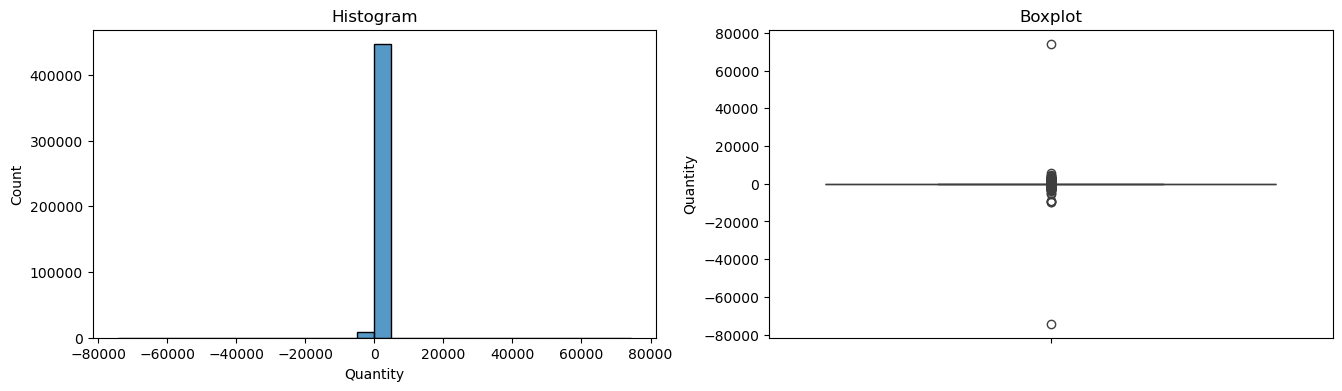


Quantity - After Capping


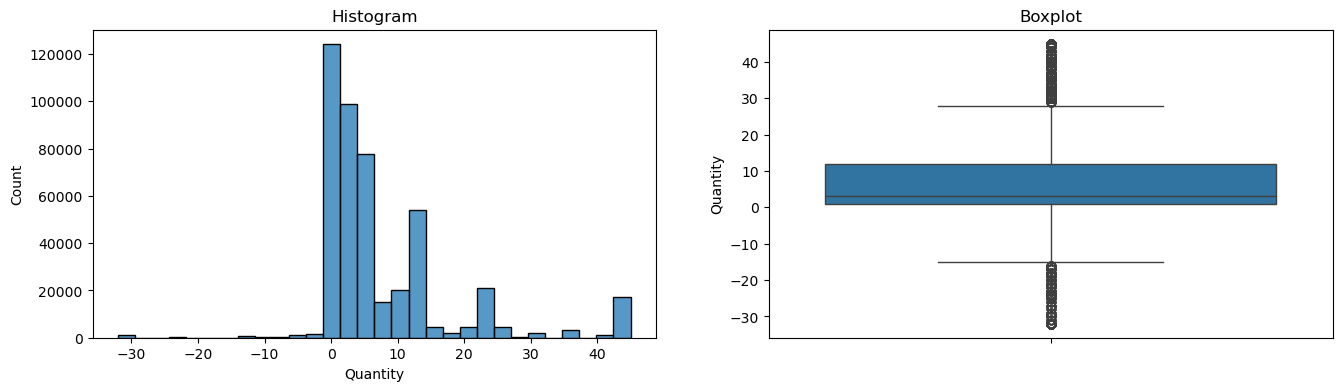

UnitPrice - Before Capping


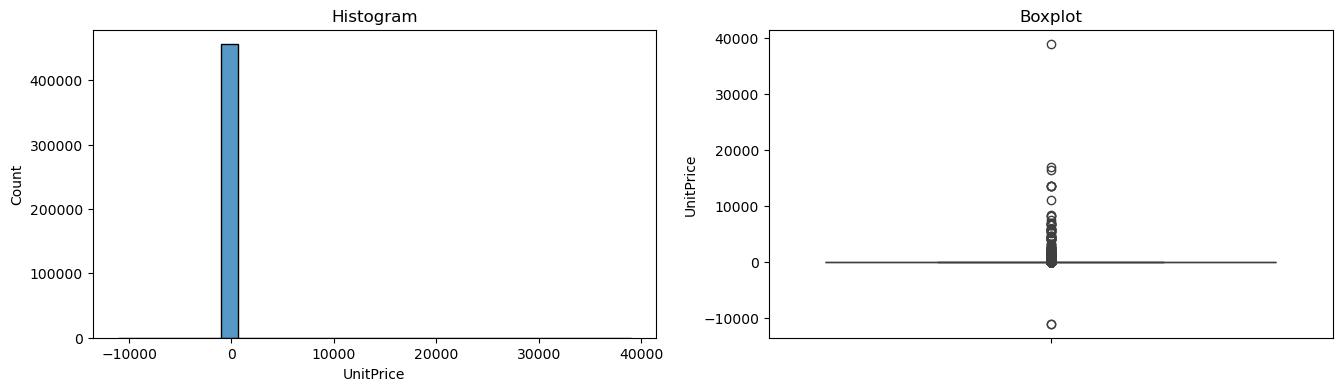


UnitPrice - After Capping


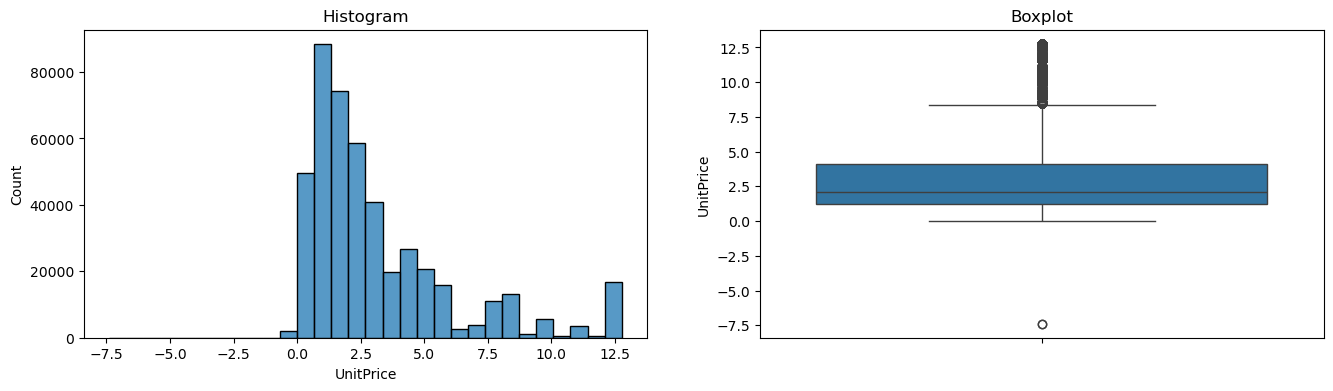

TotalPrice - Before Capping


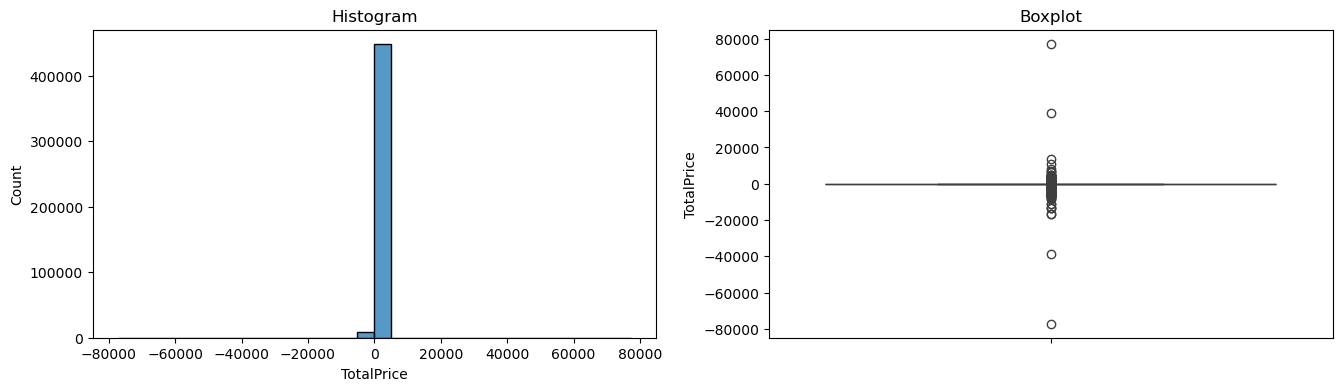


TotalPrice - After Capping


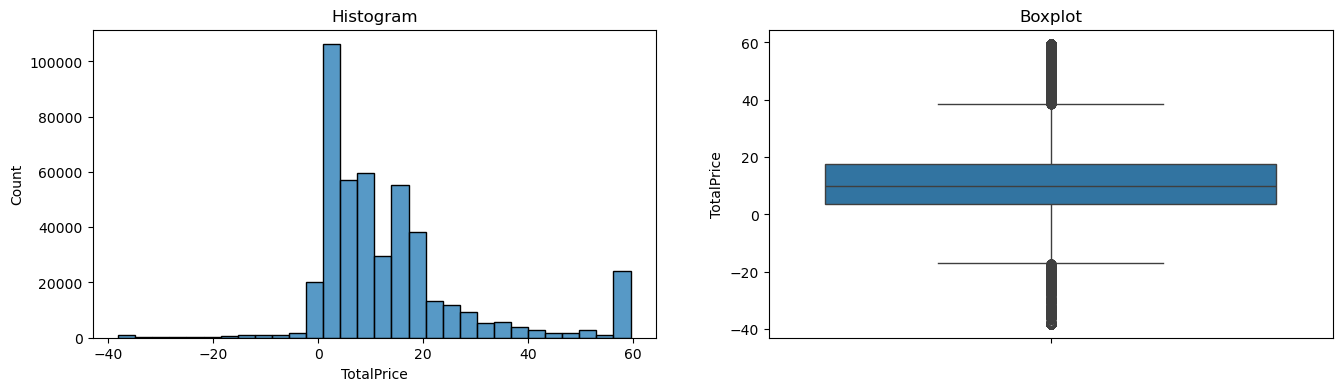

In [90]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')


    plt.show()
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(df, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(df_capped, col)

In [91]:
def calculate_outliers(df, skewness):
    # Inisialisasi list untuk menyimpan hasil
    column = []
    lower_bound = []
    upper_bound = []
    percent_total_outlier = []

    # Loop untuk menghitung outlier
    for row in range(len(skewness)):
        col = skewness['nama kolom'][row]

        # Memeriksa batas atas dan bawah
        if skewness['distribution'][row] == 'skewed':
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (IQR * 3)
            upper_boundary = df[col].quantile(0.75) + (IQR * 3)
        else:
            lower_boundary = df[col].mean() - 3 * df[col].std()
            upper_boundary = df[col].mean() + 3 * df[col].std()

        # Menambahkan ke list
        column.append(col)
        lower_bound.append(lower_boundary)
        upper_bound.append(upper_boundary)
        
        # Menghitung persentase total outlier
        totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) +
                   (len(df[df[col] < lower_boundary]) / len(df) * 100))
        percent_total_outlier.append(totout)

    # Membuat DataFrame hasil
    outliers = pd.DataFrame({
        'column': column,
        'upper_boundary': [round(ub, 2) for ub in upper_bound],
        'lower_boundary': [round(lb, 2) for lb in lower_bound],
        'percentage_total_outlier': [round(percent, 2) for percent in percent_total_outlier]
    })

    return outliers

outliers = calculate_outliers(df_capped, skewness)
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Quantity,45.00,-32.00,0.0
1,UnitPrice,12.77,-7.39,0.0
2,TotalPrice,59.55,-38.10,0.0


Outliers telah berhasil dicapping ke upper dan lower boundary,selanjutnya bisa dilakukan pengecekan mean,median dan std 

#### Mean,Median,Std

In [92]:
column1 = pd.DataFrame({
    'Average': [df_capped['Quantity'].mean(), round(df_capped['UnitPrice'].mean()), df_capped['TotalPrice'].mean()],
    'Median': [df_capped['Quantity'].median(), df_capped['UnitPrice'].median(), df_capped['TotalPrice'].median()],
    'Std': [df_capped['Quantity'].std(), df_capped['UnitPrice'].std(), df_capped['TotalPrice'].std()]
}, index=['Quantity produk', 'UnitPrice', 'TotalPrice']).T

column1

,Quantity produk,UnitPrice,TotalPrice
Average,7.581122,3.000000,13.778830
Median,3.000000,2.100000,9.950000
Std,10.484420,2.965035,15.035123


**Insight dari Statistik Deskriptif :**
1. Quantity Produk (Jumlah Barang yang Dibeli):

    - Rata-rata (Mean): Rata-rata produk yang dibeli dalam setiap transaksi adalah sekitar 7,58 unit.
    - Median: Median (nilai tengah) adalah 3 unit, menunjukkan bahwa sebagian besar transaksi melibatkan pembelian dalam jumlah kecil.
    - Standar Deviasi (Std): Nilai standar deviasi cukup tinggi, yaitu 10,48, yang menunjukkan adanya variasi besar dalam jumlah barang yang dibeli, meskipun outlier sudah ditangani.

**Kesimpulan :** Sebagian besar transaksi kecil (di sekitar median 3), tetapi ada juga beberapa transaksi dengan jumlah pembelian yang cukup besar yang berkontribusi pada rata-rata yang lebih tinggi dari median.

2. UnitPrice (Harga Satuan):

    - Rata-rata (Mean): Rata-rata harga satuan barang adalah sekitar 3,00.
    - Median: Median harga satuan adalah 2,10, yang lebih rendah daripada rata-rata. Ini menunjukkan bahwa sebagian besar barang dijual dengan - harga lebih rendah dari rata-rata, tetapi ada beberapa barang dengan harga satuan tinggi.
    - Standar Deviasi (Std): Nilai standar deviasi adalah 2,97, menunjukkan adanya variasi yang cukup besar pada harga barang.

**Kesimpulan :** Sebagian besar produk adalah barang murah (di sekitar median), tetapi ada segmen produk mahal yang menaikkan rata-rata harga satuan.

3. TotalPrice (Harga Total per Transaksi):

    - Rata-rata (Mean): Rata-rata total transaksi adalah 13,78, yang mencerminkan nilai total transaksi.
    - Median: Median total transaksi adalah 9,95, lebih rendah dari rata-rata, menunjukkan bahwa sebagian besar transaksi bernilai rendah.
    - Standar Deviasi (Std): Standar deviasi yang tinggi (15,03) menunjukkan variasi besar dalam total harga per transaksi, dengan beberapa transaksi bernilai sangat besar.

**Kesimpulan :** Sebagian besar transaksi adalah pembelian kecil dengan total harga di sekitar median. Namun, ada transaksi dengan nilai total yang tinggi yang memengaruhi rata-rata dan standar deviasi.


### 4. Identifikasi dan Segregasi Data

Selanjutnya akan dilakukan analisis dengan memisahkan transaksi dengan quantity positive dan quantity negative

In [93]:
# Dataframe dengan quantity negative
df_negative_quantity = df[df['Quantity'] < 0]

# Dataframe quantity negative (bukan return)
df_negative_quantity_not_return = df[(df['Quantity'] < 0) &(~df['InvoiceNo'].str.startswith('C', na=False))]

# Dataframe transaksi return item 
df_negative_quantity_return = df[(df['Quantity'] < 0) &(df['InvoiceNo'].str.startswith('C', na=False))]

# Dataframe dengan quantity positive
df_positive_quantity = df[df['Quantity'] > 0]

In [94]:
df_negative_quantity_return

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24,-6.96
...,...,...,...,...,...,...,...,...,...,...
458450,C575839,22551,PLASTERS IN TIN SPACEBOY,-11,1.65,12517.0,Germany,2011-11-11,11:40,-18.15
458516,C575841,21915,RED HARMONICA IN BOX,-12,1.25,13408.0,United Kingdom,2011-11-11,11:58,-15.00
459263,C575872,D,Discount,-1,97.14,13408.0,United Kingdom,2011-11-11,12:52,-97.14
459798,C575879,21892,TRADITIONAL WOODEN CATCH CUP GAME,-1,1.25,13588.0,United Kingdom,2011-11-11,13:30,-1.25


In [95]:
df_negative_quantity

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24,-6.96
...,...,...,...,...,...,...,...,...,...,...
458450,C575839,22551,PLASTERS IN TIN SPACEBOY,-11,1.65,12517.0,Germany,2011-11-11,11:40,-18.15
458516,C575841,21915,RED HARMONICA IN BOX,-12,1.25,13408.0,United Kingdom,2011-11-11,11:58,-15.00
459263,C575872,D,Discount,-1,97.14,13408.0,United Kingdom,2011-11-11,12:52,-97.14
459798,C575879,21892,TRADITIONAL WOODEN CATCH CUP GAME,-1,1.25,13588.0,United Kingdom,2011-11-11,13:30,-1.25


In [96]:
df_positive_quantity

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_time,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26,20.34
...,...,...,...,...,...,...,...,...,...,...
459973,575889,23084,RABBIT NIGHT LIGHT,4,2.08,16433.0,United Kingdom,2011-11-11,14:09,8.32
459974,575889,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,1.25,16433.0,United Kingdom,2011-11-11,14:09,15.00
459975,575889,23023,RIDGED BONNE JAM JAR T-LIGHT HOLDER,12,1.65,16433.0,United Kingdom,2011-11-11,14:09,19.80
459976,575889,22080,RIBBON REEL POLKADOTS,5,1.65,16433.0,United Kingdom,2011-11-11,14:09,8.25


### 5. Mengidentifikasi 5 produk dengan total quantity teratas

In [97]:
top_product_positive = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
top_10_product_positive = top_product_positive.head(10)
top_10_product_positive

,Description,Quantity
3962,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49664
1846,JUMBO BAG RED RETROSPOT,43360
2369,PACK OF 72 RETROSPOT CAKE CASES,34183
236,ASSORTED COLOUR BIRD ORNAMENT,32233
3872,WHITE HANGING HEART T-LIGHT HOLDER,31617
2138,MINI PAINT SET VINTAGE,24835
2336,PACK OF 12 LONDON TISSUES,23601
2367,PACK OF 60 PINK PAISLEY CAKE CASES,23379
2711,POPCORN HOLDER,22604
244,ASSORTED COLOURS SILK FAN,22028


Dari data diatas diketahui terdapat variasi dalam jenis produk yang paling laku, mulai dari mainan ("WORLD WAR 2 GLIDERS") hingga dekorasi rumah dan peralatan pesta, menunjukkan bahwa pasar menanggapi berbagai kategori produk. Oleh karena itu, keberagaman produk dapat menjangkau segmen pasar yang lebih luas.

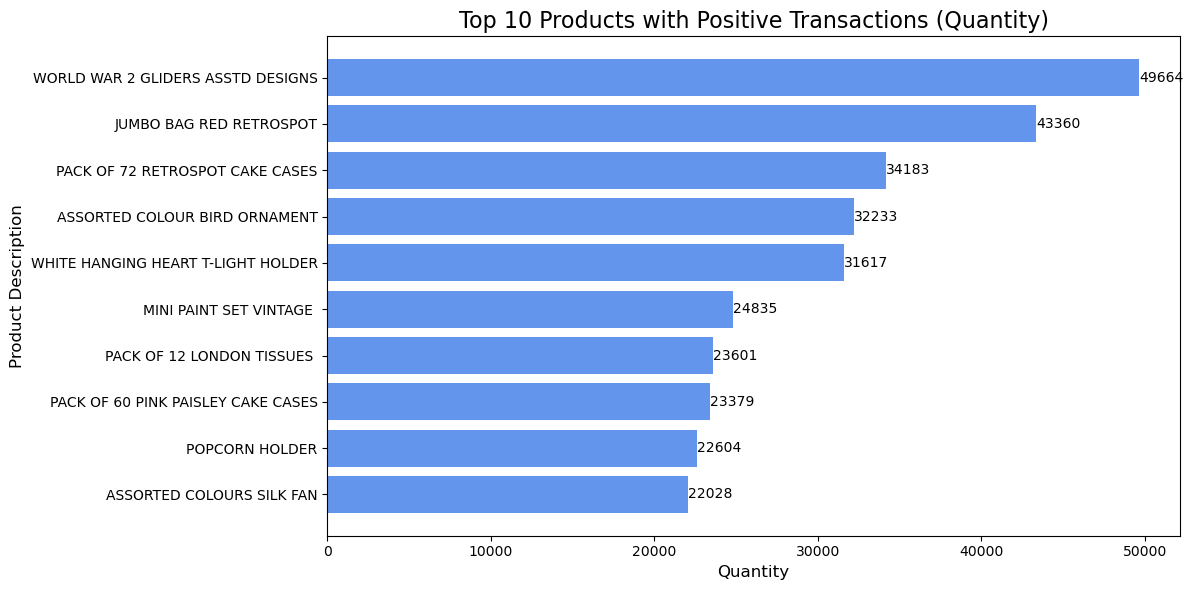

In [98]:
# Visualisasi 10 produk teratas berdasarkan Quantity
plt.figure(figsize=(12, 6))
plt.barh(top_10_product_positive['Description'], top_10_product_positive['Quantity'], color='cornflowerblue')
plt.title('Top 10 Products with Positive Transactions (Quantity)', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan jumlah di setiap bar
for i, value in enumerate(top_10_product_positive['Quantity']):
    plt.text(value + 2, i, str(value), fontsize=10, va='center')

plt.gca().invert_yaxis()  # Membalikkan sumbu Y agar produk dengan Quantity tertinggi di atas
plt.tight_layout()
plt.show()

Dari Visualisasi diatas diketahui : 
- Produk "WORLD WAR 2 GLIDERS ASSTD DESIGNS" memimpin dengan 49664 unit terjual, diikuti oleh "JUMBO BAG RED RETROSPOT" dan "PACK OF 72 RETROSPOT CAKE CASES" dengan jumlah yang cukup signifikan (43360 dan 34183 unit). Ini menunjukkan bahwa produk-produk ini sangat diminati oleh pelanggan dan bisa dianggap sebagai produk unggulan.
- Beberapa produk, seperti "WHITE HANGING HEART T-LIGHT HOLDER", yang kemungkinan besar terkait dengan dekorasi untuk acara tertentu, menunjukkan adanya potensi untuk penjualan musiman atau berbasis tren.

Rekomendasi : 
- Perkuat Pemasaran untuk Produk Terlaris, produk seperti "WORLD WAR 2 GLIDERS ASSTD DESIGNS" dan "JUMBO BAG RED RETROSPOT" sangat laris, fokuskan pemasaran yang lebih intens untuk produk-produk ini. Gunakan strategi pemasaran berbasis data untuk menargetkan audiens yang relevan dan memperkenalkan produk ini di berbagai platform e-commerce atau media sosial.
- Evaluasi Musiman dan Penjualan Berdasarkan Tren,Lakukan analisis tren musiman untuk produk dekorasi seperti "WHITE HANGING HEART T-LIGHT HOLDER" dan sesuaikan strategi pemasaran untuk produk-produk tersebut agar dapat dimanfaatkan selama musim tertentu atau periode yang lebih sibuk.
- Menjaga keberagaman produk, baik itu mainan, peralatan pesta, atau dekorasi rumah, dapat meningkatkan peluang untuk menarik segmen pasar yang lebih luas.

In [99]:
bot_product_positive = df_positive_quantity.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
bot_10_product_positive = bot_product_positive.tail(20)
bot_10_product_positive

,Description,Quantity
1644,HAYNES CAMPER SHOULDER BAG,1
1088,Dotcomgiftshop Gift Voucher £100.00,1
1401,Found by jackie,1
2705,PURPLE CHUNKY GLASS+BEAD NECKLACE,1
437,BLUE CRYSTAL BOOT PHONE CHARM,1
2960,"RUBY GLASS NECKLACE 42""",1
445,BLUE DROP EARRINGS W BEAD CLUSTER,1
2259,ORANGE FELT VASE + FLOWERS,1
1410,GARDENERS KNEELING PAD,1
1553,GREEN PENDANT SHELL NECKLACE,1


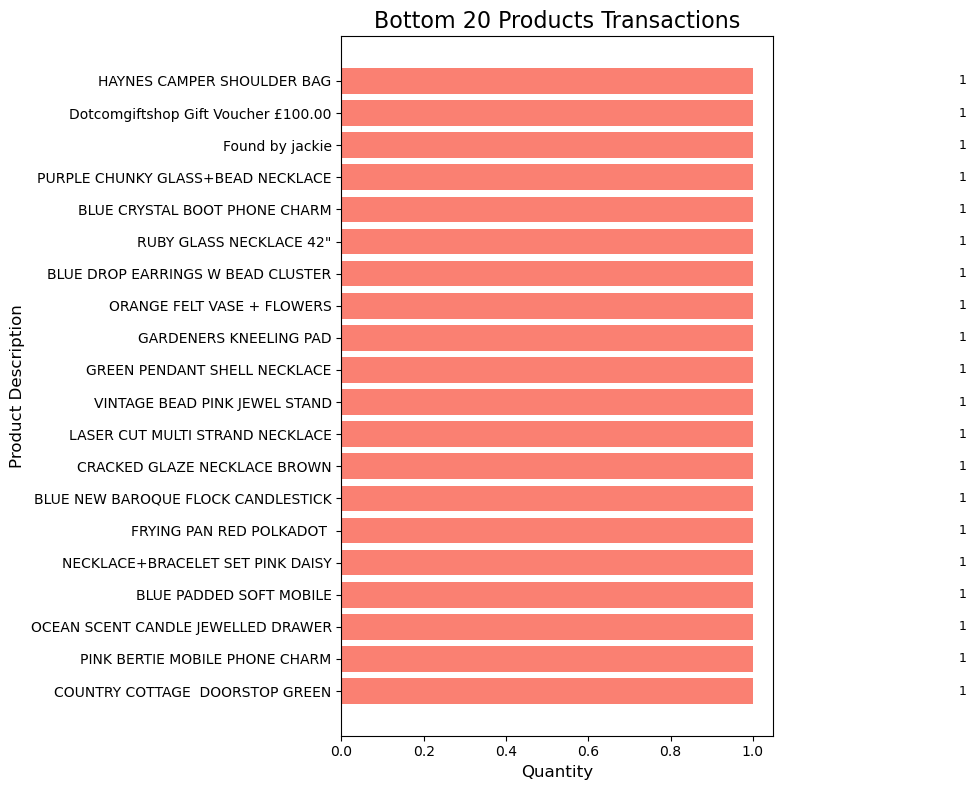

In [100]:
# Visualisasi 20 produk terbawah berdasarkan Quantity
plt.figure(figsize=(12, 8))
plt.barh(bot_10_product_positive['Description'], bot_10_product_positive['Quantity'], color='salmon')
plt.title('Bottom 20 Products Transactions', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan jumlah di setiap bar
for i, value in enumerate(bot_10_product_positive['Quantity']):
    plt.text(value + 0.5, i, str(value), fontsize=9, va='center')

plt.gca().invert_yaxis()  # Membalikkan sumbu Y agar produk dengan Quantity terkecil di atas
plt.tight_layout()
plt.show()

Produk dengan penjualan terbatas atau sangat sedikit seperti data diatas yang hanya tercatat memiliki 1 unit bisa dievaluasi apakah tetap perlu diproduksi atau dipertahankan dalam stok.Jika produk tersebut tidak relevan atau tidak memenuhi permintaan, pertimbangkan untuk menghapusnya dari daftar produk yang dijual dan lebih fokus pada produk yang terbukti lebih populer dan menguntungkan

In [103]:
top_operational_miss = df_negative_quantity_not_return.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
top_operational_miss

,Description,Quantity
706,printing smudges/thrown away,-19200
605,"Unsaleable, destroyed.",-15644
23,?,-9532
464,Printing smudges/thrown away,-9058
184,Damaged,-7540
...,...,...
595,TOP SECRET PEN SET,-1
218,FLOWER PURPLE CLOCK WITH SUCKER,-1
604,UTILTY CABINET WITH HOOKS,-1
585,TEA TIME BREAKFAST BASKET,-1


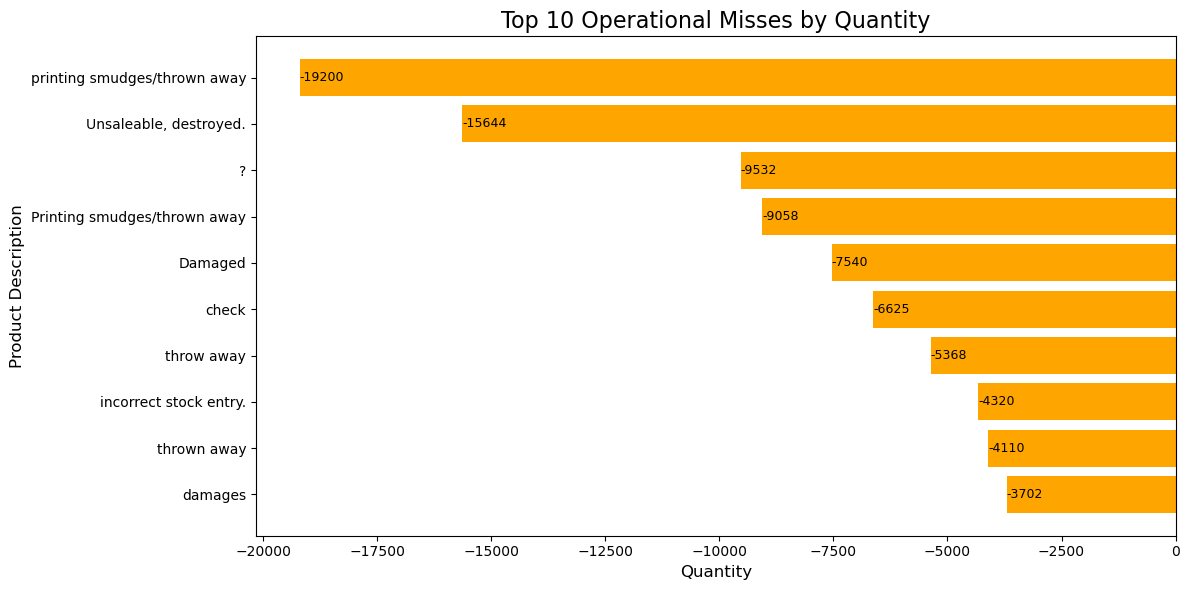

In [104]:
# Memilih 10 produk teratas dengan kuantitas negatif terbesar
top_10_operational_miss = top_operational_miss.head(10)

# Visualisasi Bar Chart Horizontal
plt.figure(figsize=(12, 6))
plt.barh(top_10_operational_miss['Description'], top_10_operational_miss['Quantity'], color='orange')
plt.title('Top 10 Operational Misses by Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan nilai di setiap bar
for i, value in enumerate(top_10_operational_miss['Quantity']):
    plt.text(value - 0.5, i, str(value), fontsize=9, va='center', color='black')

plt.gca().invert_yaxis()  # Membalikkan sumbu Y
plt.tight_layout()
plt.show()

Dari data diatas kita dapat mengetahui banyaknya produk-produk yang mengalami kerusakan dll. Untuk mengurangi adanya resiko tersebut perusahaan bisa melakukan beberapa hal seperti : 
1. Implementasikan sistem pengawasan yang lebih ketat selama proses produksi dan pengemasan untuk mengurangi jumlah produk yang rusak atau tidak memenuhi standar kualitas. Misalnya, produk yang tercatat sebagai "Printing smudges/thrown away" harus diperiksa lebih teliti untuk menghindari kerugian yang tidak perlu.

2. Menerapkan pengelolaan inventaris yang lebih baik untuk meminimalkan kerugian dari produk yang tidak dapat dijual atau rusak, dan mencegah penumpukan produk yang tidak lagi memiliki nilai pasar.

3. Melakukan peninjauan dan pengelolaan inventaris yang lebih cermat untuk produk-produk yang tidak laku atau sering rusak, guna meminimalkan pemborosan dan memastikan produk yang disediakan adalah yang paling diminati pasar.


### 6. Produk Paling menguntungkan 

In [105]:
top_product = df.groupby('Description')[['Quantity','TotalPrice']].sum().reset_index().sort_values(by='TotalPrice',ascending=False)
top_10_product = top_product.head(10)
top_10_product

,Description,Quantity,TotalPrice
1083,DOTCOM POSTAGE,1657,157174.49
2884,REGENCY CAKESTAND 3 TIER,11905,149849.88
2442,PARTY BUNTING,17156,93759.30
3872,WHITE HANGING HEART T-LIGHT HOLDER,31617,89286.31
1846,JUMBO BAG RED RETROSPOT,43360,84247.64
2724,POSTAGE,5932,56586.22
236,ASSORTED COLOUR BIRD ORNAMENT,32233,52169.37
762,CHILLI LIGHTS,8397,43029.97
2492,PICNIC BASKET WICKER 60 PIECES,61,39619.50
1844,JUMBO BAG PINK POLKADOT,19557,38612.45


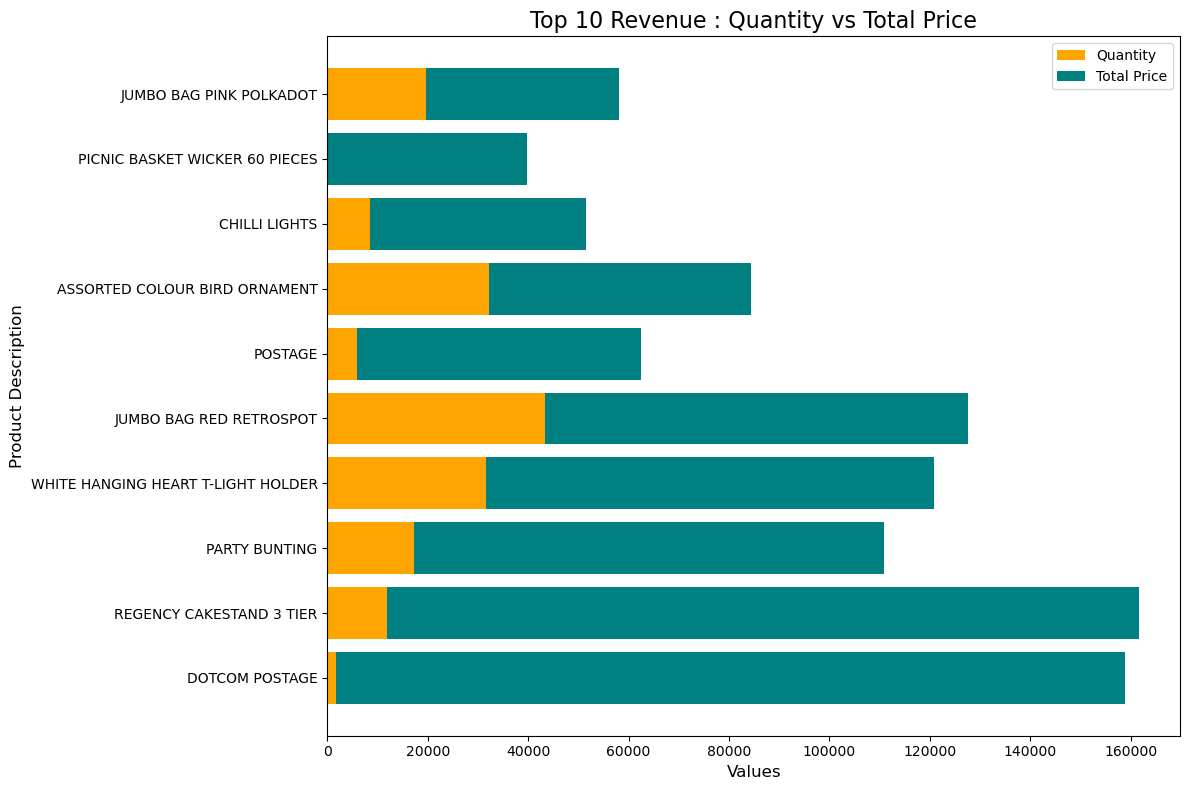

In [106]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_product['Description'], top_10_product['Quantity'], color='orange', label='Quantity')
plt.barh(top_10_product['Description'], top_10_product['TotalPrice'], left=top_10_product['Quantity'], color='teal', label='Total Price')

plt.title('Top 10 Revenue : Quantity vs Total Price', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


Dari Visualisasi diatas dapat dilihat bahwa keuntungan terbesar tidak dipengaruhi dari jumlah quantitas yang berhasil terjual 

Insight:
- Produk Paling Laku (Berdasarkan Kuantitas):"JUMBO BAG RED RETROSPOT" dan "WHITE HANGING HEART T-LIGHT HOLDER" adalah produk terlaris, jadi pastikan stok cukup dan promosikan lebih banyak.
- Produk dengan Pendapatan Tinggi: "DOTCOM POSTAGE" menghasilkan pendapatan besar meskipun unitnya sedikit. Bisa tingkatkan promosi untuk meningkatkan volume penjualannya.
- Produk yang Kurang Terjual: "PICNIC BASKET WICKER 60 PIECES" terjual sedikit, perlu strategi pemasaran yang lebih terarah atau tawarkan diskon untuk menarik lebih banyak pembeli.

Rekomendasi Bisnis:
- Fokus pada produk yang sudah populer, seperti "JUMBO BAG RED RETROSPOT" dan "WHITE HANGING HEART T-LIGHT HOLDER". Coba promosikan lebih banyak.
- Manfaatkan produk dengan pendapatan tinggi seperti "DOTCOM POSTAGE dan "REGENCY CAKESTAND" dengan meningkatkan promosi.
- Untuk produk dengan penjualan rendah, seperti "PICNIC BASKET WICKER", coba lakukan diskon atau promosi musiman.

### 7. Mengidentifikasi peluang untuk meningkatkan retensi pelanggan

In [107]:
top_customer = df.groupby('Country')['CustomerID'].nunique().reset_index(name='Total_Customer').sort_values(by='Total_Customer',ascending=False)
top_10_customer = top_customer.head(10)
top_10_customer

,Country,Total_Customer
36,United Kingdom,3744
14,Germany,89
13,France,86
31,Spain,29
3,Belgium,25
33,Switzerland,21
27,Portugal,17
19,Italy,13
12,Finland,11
25,Norway,10


In [108]:

fig = px.bar(
    top_10_customer,
    x='Country',
    y='Total_Customer',
    text='Total_Customer',
    title='Top 10 Countries by Unique Customers',
    labels={'Country': 'Country', 'Total_Customer': 'Number of Unique Customers'},
    color='Total_Customer',
    color_continuous_scale='Blues'
)

fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Unique Customers',
    uniformtext_minsize=8, uniformtext_mode='hide'
)
fig.show()


Dari Visualisasi diatas diketahui : 
- United Kingdom memiliki jumlah pelanggan yang jauh lebih tinggi, yakni 3744, dibandingkan dengan negara lainnya. Hal ini menunjukkan bahwa UK adalah pasar utama atau pasar yang paling menguntungkan
- Negara-negara seperti Belgium (25 pelanggan), Switzerland (21 pelanggan), Portugal (17 pelanggan), dan Italy (13 pelanggan) memiliki jumlah pelanggan yang sangat terbatas. Ini menunjukkan bahwa ada potensi pasar yang belum dieksplorasi dengan maksimal di negara-negara tersebut.

Negara-negara dengan jumlah pelanggan yang terbatas, seperti Germany, France, Spain, Belgium, dan Portugal, harus menjadi fokus utama untuk peningkatan penetrasi pasar.
Rekomendasi : 
- Lakukan strategi pemasaran yang lebih lokal, promosi yang disesuaikan dengan preferensi lokal, dan kemitraan dengan distributor atau pengecer lokal dapat membantu memperkenalkan produk ke pasar-pasar ini dengan lebih efektif.

- Penggunaan iklan digital yang ditargetkan atau kolaborasi dengan influencer lokal untuk membantu menarik perhatian lebih banyak pelanggan di negara-negara dengan jumlah customer yang masih sedikit.

- United Kingdom memiliki jumlah pelanggan yang dominan, perusahaan dapat mempertahankan atau bahkan memperkuat posisi mereka di pasar ini dengan kampanye promosi khusus, pembaruan produk, atau pengenalan produk baru yang sesuai dengan permintaan pasar yang ada di UK. 

### 8. Mengidentifikasi 5 Negara yang memiliki tingkat transaksi paling banyak dan paling sedikit

In [109]:
# 5 negara dengan transaksi terbanyak
top_country = df.groupby('Country')['InvoiceNo'].nunique().reset_index(name='Total_Transaction').sort_values(by='Total_Transaction',ascending=False)
top_5_countries = top_country.head(10).reset_index(drop=True)
top_5_countries

,Country,Total_Transaction
0,United Kingdom,20466
1,Germany,522
2,France,395
3,EIRE,313
4,Belgium,106
5,Spain,94
6,Netherlands,88
7,Switzerland,69
8,Australia,66
9,Portugal,59


In [110]:
# 5 negara dengan transaksi paling sedikit
top_country = df.groupby('Country')['InvoiceNo'].nunique().reset_index(name='Total_Transaction').sort_values(by='Total_Transaction',ascending=False)
bottom_5_countries = top_country.tail(10).sort_values(by='Total_Transaction',ascending=True).reset_index(drop=True)
bottom_5_countries

,Country,Total_Transaction
0,Lebanon,1
1,RSA,1
2,Brazil,1
3,Saudi Arabia,2
4,Czech Republic,3
5,United Arab Emirates,3
6,Lithuania,4
7,USA,4
8,Bahrain,4
9,European Community,5


Berdasarkan data yang dihimpun, negara dengan jumlah transaksi paling sedikit biasanya adalah negara-negara dengan volume penjualan yang rendah, yang bisa disebabkan oleh beberapa faktor, seperti rendahnya jumlah pelanggan, kurangnya pemasaran, atau ketidaktersediaan produk di pasar tersebut.Negara-negara dengan transaksi rendah sering kali tidak menjadi pasar utama bagi perusahaan atau memiliki sedikit aktivitas pembelian. Hal ini bisa mengindikasikan bahwa perusahaan perlu mengevaluasi kembali strategi distribusi dan pemasarannya di negara-negara tersebut.

In [159]:
# Create a bar chart for the 5 countries with the least transactions
fig = px.bar(bottom_5_countries, 
             x='Country', 
             y='Total_Transaction', 
             title='Top 5 Countries with the Least Transactions',
             labels={'Country': 'Country', 'Total_Transaction': 'Total Transactions'})

# Show the plot
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Negara-negara dengan sedikit transaksi bisa menjadi peluang pasar yang belum tergarap dengan baik. Jika negara-negara ini memiliki potensi ekonomi, perusahaan bisa memfokuskan upaya untuk meningkatkan brand awareness, melakukan kampanye pemasaran, atau memperkenalkan produk-produk yang lebih sesuai dengan selera konsumen lokal.

Rekomendasi : 
- Lakukan evaluasi terhadap infrastruktur distribusi di negara-negara dengan transaksi rendah.
-  lokalisasi produk untuk menyesuaikan selera pasar atau penawaran produk yang lebih relevan bisa menjadi kunci untuk meningkatkan volume transaksi.
-  Strategi pemasaran yang lebih terlokalisasi, seperti penggunaan media sosial dan influencer lokal

### 9. Identifikasi produk dengan tingkat pengembalian tertinggi.


In [154]:
top_return_product = df_negative_quantity_return.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity')
top_10_return_product = top_return_product.head(10)
top_10_return_product

,Description,Quantity
978,MEDIUM CERAMIC TOP STORAGE JAR,-74494
1393,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
1043,Manual,-3913
570,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114
1787,WHITE HANGING HEART T-LIGHT HOLDER,-2571
682,GIN + TONIC DIET METAL SIGN,-2030
791,HERB MARKER BASIL,-1527
596,FELTCRAFT DOLL MOLLY,-1446
1667,TEA TIME PARTY BUNTING,-1424
1129,PAPER POCKET TRAVELING FAN,-1385


In [158]:

# Create a horizontal bar chart using Plotly
fig = px.bar(top_10_return_product, 
             x='Quantity', 
             y='Description', 
             orientation='h', 
             title='Top 10 Return Products by Quantity',
             labels={'Description': 'Product Description', 'Quantity': 'Total Quantity Returned'})

# Show the plot
fig.show()

Dari Visualisasi diatas,diketahui : 
- Produk dengan pengembalian tertinggi adalah "MEDIUM CERAMIC TOP STORAGE JAR" dengan Quantity -74494, menunjukkan banyaknya pengembalian atau kerugian terkait produk ini.
- Produk lain yang juga memiliki pengembalian tinggi adalah "ROTATING SILVER ANGELS T-LIGHT HLDR" dan "Manual" dengan pengembalian masing-masing -9376 dan -3913. Ini mengindikasikan bahwa sejumlah besar produk ini mungkin memiliki masalah kualitas atau penyusutan dalam penjualan.
- Beberapa produk yang sering dikembalikan termasuk barang-barang yang lebih bersifat dekoratif dan aksesori rumah, seperti "WHITE HANGING HEART T-LIGHT HOLDER" dan "GIN + TONIC DIET METAL SIGN", yang menunjukkan bahwa produk dengan elemen dekoratif cenderung lebih rentan terhadap pengembalian. hal ini bisa dikarenakan karena barang-barang tersebut mengalami kerusakan saat pengiriman sehingga customer melakukan return barang 

Rekomendasi :   
Alasan customer melakukan return barang terjadi karena kekecewaan produk yang tidak memenuhi harapan konsumen. untuk itu perusahaan harus lebih memperhatikan dan mempertahankan kualitas produk-produk yang dimiliki. berikut hal-hal yang bisa dilakukan :
-  Identifikasi masalah yang mungkin menyebabkan kerusakan atau pengembalian produk dalam jumlah besar, seperti masalah kualitas material, kesalahan pengemasan, atau ketidaksesuaian ekspektasi pelanggan.
- Produk dengan pengembalian tinggi mungkin juga dipengaruhi oleh masalah dalam proses pengiriman dan pengemasan. Memastikan bahwa produk lebih aman dikemas atau lebih terlindungi dalam pengiriman dapat membantu mengurangi kerugian dan pengembalian produk yang lebih tinggi.
- Jika banyak pengembalian berasal dari masalah dengan kualitas atau ketidaksesuaian ekspektasi, maka mengembangkan kebijakan pengembalian yang lebih fleksibel dan menyediakan dukungan pelanggan yang lebih responsif
- Berikan pelatihan kepada tim penjualan dan pemasaran untuk lebih memahami ekspektasi pelanggan dan memperkenalkan produk dengan lebih efektif. Peningkatan kualitas produk dan pengawasan yang lebih ketat dapat membantu mengurangi kerugian produk yang sering dikembalikan.

### 10. Produk-produk yang paling sering mengalami kerusakan

In [132]:
# Memfilter data dengan Description "DAMAGED"
damaged_data = df_negative_quantity_not_return[df_negative_quantity_not_return['Description'].str.contains('DAMAGED', na=False, case=False)]

# Mengelompokkan data berdasarkan StockCode dan menghitung Quantity
top_damaged_product = (
    damaged_data.groupby('StockCode')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=True)
)
top_damaged_product.head()

,StockCode,Quantity
20,23114,-1440
23,23117,-1440
22,23116,-1440
21,23115,-1440
19,23113,-1440


In [121]:
# Ambil pasangan unik StockCode dan Description dari dataframe awal
stock_description_mapping = (
    df_negative_quantity_not_return[['StockCode', 'Description','Invoice_Date']]
    .drop_duplicates()
)

# Gabungkan hasil agregasi dengan deskripsi
top_damaged_product_with_description = top_damaged_product.merge(
    stock_description_mapping,
    on='StockCode',
    how='left'
)

# Tampilkan hasil
top_damaged_product_with_description


,StockCode,Quantity,Description,Invoice_Date
0,23114,-1440,Damaged,2011-06-21
1,23117,-1440,Damaged,2011-06-21
2,23116,-1440,Damaged,2011-06-21
3,23115,-1440,Damaged,2011-06-21
4,23113,-1440,Damaged,2011-06-16
...,...,...,...,...
76,85167B,-1,DAMAGED,2011-04-14
77,79163,-1,sold as set on dotcom,2011-06-10
78,79163,-1,BLACK CHAMPAGNE GLASS,2011-08-18
79,79163,-1,damaged,2011-09-22


In [133]:
# Buat mapping antara StockCode dan Description unik yang bukan 'Damaged'
description_mapping = (
    df[df['Description'] != 'Damaged'][['StockCode', 'Description']]
    .drop_duplicates()
    .set_index('StockCode')
    .to_dict()['Description']
)

# Ganti deskripsi 'Damaged' dengan deskripsi lain berdasarkan StockCode
top_damaged_product_with_description['Description'] = df.apply(
    lambda row: description_mapping[row['StockCode']] if row['Description'] == 'Damaged' else row['Description'],
    axis=1
)
top_10_damaged_products = top_damaged_product_with_description.head(10)
top_10_damaged_products.head()


,StockCode,Quantity,Description,Invoice_Date
0,23114,-1440,WHITE HANGING HEART T-LIGHT HOLDER,2011-06-21
1,23117,-1440,WHITE METAL LANTERN,2011-06-21
2,23116,-1440,CREAM CUPID HEARTS COAT HANGER,2011-06-21
3,23115,-1440,KNITTED UNION FLAG HOT WATER BOTTLE,2011-06-21
4,23113,-1440,RED WOOLLY HOTTIE WHITE HEART.,2011-06-16


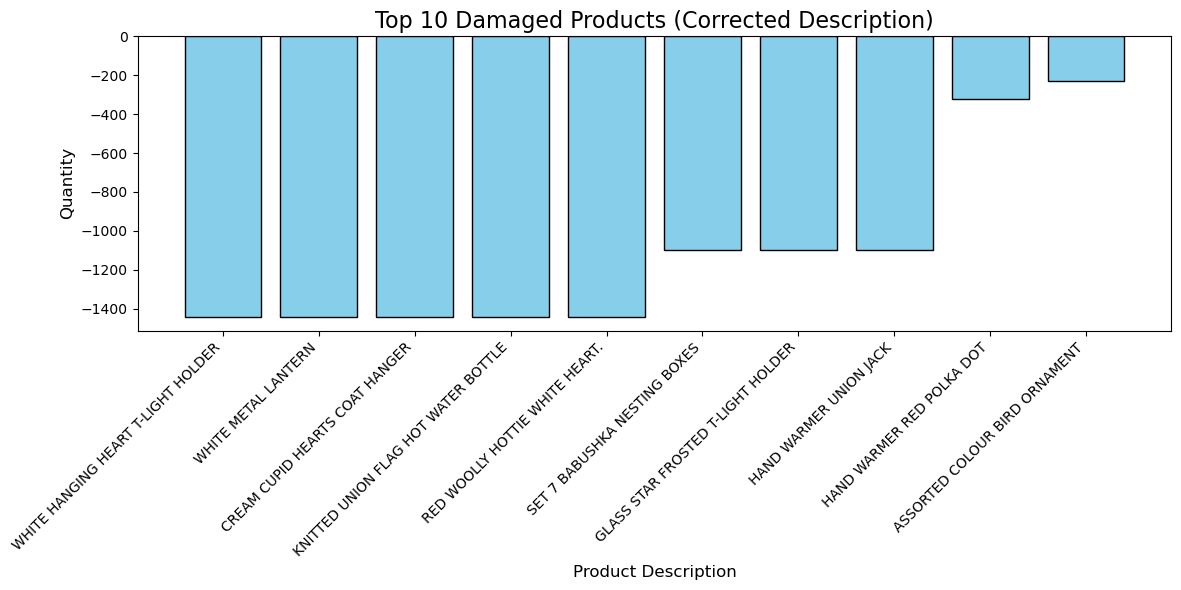

In [130]:
# Plot Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(
    top_10_damaged_products['Description'],
    top_10_damaged_products['Quantity'],
    color='skyblue',
    edgecolor='black'
)

# Menambahkan judul dan label
plt.title('Top 10 Damaged Products (Corrected Description)', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Memiringkan label pada sumbu x untuk keterbacaan
plt.tight_layout()

plt.show()

Dari Bar Chart diatas,diketahui : 
- Produk-produk yang teridentifikasi dengan deskripsi "Damaged" memiliki Quantity negatif,yang menunjukkan bahwa jumlah produk yang rusak tercatat dalam sistem sebagai pengurangan stok akibat kerusakan.
- 4 Produk Teratas semuanya memiliki quantity negatif yang sama (-1440) dan terdata dihari yang sama 
- Tanggal invoice yang tercatat (2011-06-21, 2011-06-16) menunjukkan waktu tertentu di mana produk dengan deskripsi "Damaged" diproses. Ini mungkin mengindikasikan adanya masalah dengan batch produk tertentu yang diproduksi atau dikirim pada periode tersebut.

Rekomendasi Bisnis :    
-  Identifikasi penyebab mengapa produk tertentu rusak dalam jumlah besar, apakah karena kualitas produk, proses pengiriman, atau penyimpanan yang buruk. Fokuskan perhatian pada batch produk tertentu yang sering mengalami kerusakan.
- Pastikan bahwa proses pengemasan dan pengiriman produk lebih kuat, terutama untuk produk yang lebih rentan terhadap kerusakan. Menyediakan pengemasan yang lebih aman atau menggunakan bahan pelindung tambahan bisa membantu mengurangi kerusakan selama pengiriman.
- Analisis produk dengan kerusakan tinggi dan coba untuk mengurangi kerusakan produk di masa depan.


### 11. Total Penjualan per negara

In [139]:
# 5 negara dengan transaksi terbanyak
top_country = df.groupby('Country')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice',ascending=False)
top_5_countries = top_country.head(10).reset_index(drop=True)
top_5_countries

,Country,TotalPrice
0,United Kingdom,6976112.024
1,Netherlands,261387.540
2,EIRE,232627.410
3,Germany,192722.640
4,France,171069.010
5,Australia,131367.970
6,Switzerland,54746.340
7,Spain,48439.610
8,Belgium,36171.250
9,Sweden,34847.220


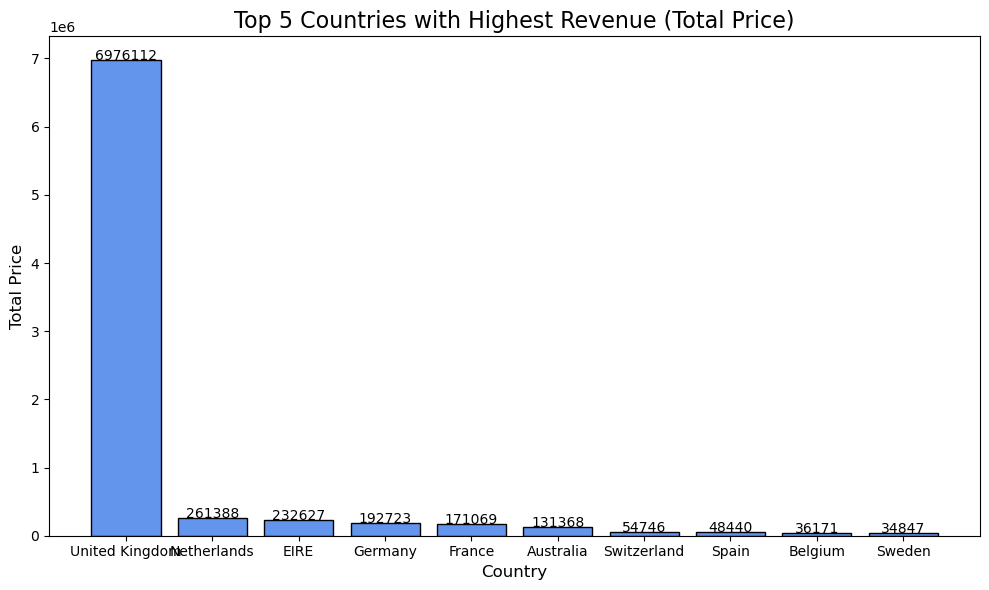

In [ ]:
# Plot Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(
    top_5_countries['Country'],
    top_5_countries['TotalPrice'],
    color='cornflowerblue',
    edgecolor='black'
)

# Menambahkan judul dan label
plt.title('Top 5 Countries with Highest Revenue (Total Price)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Price', fontsize=12)

# Menampilkan nilai pada setiap bar
for i, v in enumerate(top_5_countries['TotalPrice']):
    plt.text(i, v + 1000, f"{v:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


Dari grafik diatas,diketahui : 
- United Kingdom menempati posisi teratas dengan total harga penjualan sebesar 6.976.112,024, yang sangat jauh lebih tinggi dibandingkan negara lainnya. United Kingdom jelas mendominasi pasar, berkontribusi jauh lebih besar dibandingkan negara-negara lain. Berdasarkan pola yang ada pada data kemungkinan pusat toko memang berada di UK 
- Beberapa negara seperti Netherlands (261.387,540) dan Germany (192.722,640) juga menunjukkan kontribusi signifikan, tetapi tidak sebanding dengan UK.

Rekomendasi :    
- Mengingat United Kingdom memiliki kontribusi yang sangat besar terhadap total penjualan, perusahaan dapat mengoptimalkan strategi pemasaran di sana untuk meningkatkan konversi dan volume penjualan lebih lanjut. Bisa juga mempertimbangkan penawaran produk eksklusif atau program loyalitas pelanggan untuk meningkatkan retensi.

- Ekspansi dan Diversifikasi Pasar di Negara Lain, perusahaan dapat memperluas jangkauan pasar dengan memperkuat kegiatan pemasaran digital atau kolaborasi dengan distributor lokal di negara-negara ini untuk meningkatkan visibilitas dan penjualan.
- Strategi Penjualan di Negara dengan Penjualan Rendah,perusahaan dapat melakukan kampanye promosi atau diskon untuk meningkatkan daya tarik produk.
- Melakukan analisis lebih lanjut mengenai produk yang paling banyak diminati di masing-masing negara dapat membantu untuk menyesuaikan penawaran produk. 
- Perusahaan bisa melakukan kampanye brand awareness atau pemasaran influencer untuk meningkatkan eksposur dan mengedukasi konsumen lebih banyak tentang produk yang ditawarkan.


### 12. Trend penjualan dari waktu ke waktu (Perbulan)

In [117]:
df['Invoice_Date']= pd.to_datetime(df['Invoice_Date'])
monthly_order = df.resample(rule = 'M',on = 'Invoice_Date').agg({
    'InvoiceNo':'nunique',
    'TotalPrice':'sum'
})

monthly_order.index = monthly_order.index.strftime('%Y-%m')
monthly_order= monthly_order.reset_index()
monthly_order.rename(columns = {
    'Invoice_Date': 'Date',
    'InvoiceNo':'total_order',
    'TotalPrice':'revenue'
},inplace=True)
monthly_order

,Date,total_order,revenue
0,2010-12,2010,746723.610
1,2011-01,1448,558448.560
2,2011-02,1391,497026.410
3,2011-03,1974,682013.980
4,2011-04,1707,492367.841
5,2011-05,2154,722094.100
6,2011-06,2012,689977.230
7,2011-07,1916,680156.991
8,2011-08,1737,681386.460
9,2011-09,2325,1017596.682


In [147]:
# Membuat subplot dengan 2 kolom
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Orders', 'Revenue'))

# Menambahkan line chart untuk total orders
fig.add_trace(go.Scatter(x=monthly_order['Date'], y=monthly_order['total_order'], mode='lines+markers', name='Total Orders'),
              row=1, col=1)

# Menambahkan line chart untuk revenue
fig.add_trace(go.Scatter(x=monthly_order['Date'], y=monthly_order['revenue'], mode='lines+markers', name='Revenue'),
              row=1, col=2)

# Menambahkan judul dan label sumbu
fig.update_layout(title_text='Monthly Orders and Revenue', xaxis_title='Date', yaxis_title='Count / Revenue', 
                  showlegend=False)

# Menampilkan chart
fig.update_layout(height=600, width=1200)
fig.show()



Dari Grafik diatas diketahui :
1. Tren Total Order dan Pendapatan:  jumlah total order dan pendapatan mengalami fluktuasi dari bulan ke bulan. 
2. Secara umum, tampaknya ada peningkatan order dan pendapatan pada bulan-bulan tertentu, seperti bulan September dan Oktober. Ini mungkin menunjukkan adanya musim penjualan tinggi, atau adanya kampanye pemasaran atau diskon yang lebih aktif di bulan-bulan tersebut.
3. Jika melihat fluktuasi pada bulan-bulan dengan jumlah order rendah (misalnya, 2011-02), analisis lebih lanjut dapat dilakukan untuk mengidentifikasi faktor-faktor yang menyebabkan penurunan tersebut. Bisa jadi terkait dengan keterbatasan promosi, ketersediaan produk, atau perubahan pasar.

Rekomendasi : Perusahaan dapat memanfaatkan bulan-bulan dengan penurunan pendapatan untuk meningkatkan promosi atau menawarkan diskon khusus guna meningkatkan jumlah order dan pendapatan. Juga, dapat mempertimbangkan peningkatan penawaran produk atau memperkenalkan produk baru di bulan-bulan dengan performa rendah.

# Conclusion 
Berdasarkan analisis yang telah dilakukan, berikut adalah kesimpulan yang dapat diambil:

1. Target Pendapatan: Berdasarkan perhitungan, target pendapatan yang ingin dicapai adalah Rp9,205,801.41. Ini merupakan 10% lebih tinggi dari pendapatan saat ini.

2. Strategi untuk Mencapai Target: 
    - Meningkatkan Jumlah Transaksi: Fokus pada meningkatkan jumlah transaksi dengan melakukan promosi atau menawarkan produk yang lebih banyak dibutuhkan oleh pelanggan.

    - Meningkatkan Nilai Transaksi: Memperkenalkan upsell atau cross-sell untuk mendorong pembelian yang lebih besar per transaksi.
    Mengoptimalkan Harga: Meninjau harga produk dan melihat apakah ada ruang untuk penyesuaian harga, baik melalui diskon, bundling, atau strategi harga yang lebih kompetitif.

    - Efisiensi Operasional: Mengurangi biaya operasional untuk meningkatkan margin keuntungan, misalnya melalui manajemen persediaan yang lebih baik atau pengurangan pemborosan.

    - Memperluas Pasar: Ekspansi ke pasar baru atau memperluas jangkauan pasar dengan meningkatkan promosi di luar wilayah yang sudah ada.
    - Meningkatkan Kepuasan Pelanggan: Fokus pada peningkatan pengalaman pelanggan dengan memperbaiki kualitas layanan dan produk, serta mendengarkan umpan balik untuk perbaikan.

Dengan menerapkan strategi-strategi di atas, perusahaan dapat lebih mudah mencapai target pendapatan sebesar Rp9,205,801.41 dan mendorong pertumbuhan yang berkelanjutan.